In [22]:
import numpy as np
import pandas as pd
import math
import sklearn
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [23]:
###   Function 2 #####
x = torch.unsqueeze(torch.linspace(-1, 1, 200), dim=1)

#choosing sin(x) as a nonliner function
y = (np.sign(np.sin(5*np.pi*x)))

print('length of x:',x.shape)
print('length of y:',y.shape)

length of x: torch.Size([200, 1])
length of y: torch.Size([200, 1])


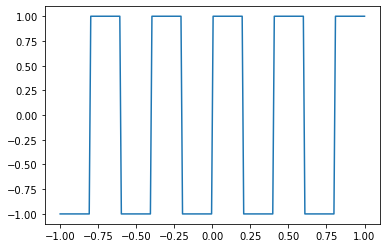

In [24]:
plt.plot(x,y)

In [25]:
#Function for model 1
class Model1(nn.Module):
    def __init__(self,):
        super().__init__()
        # hidden layers
        self.hiddenlayer1 = nn.Linear(1, 5)   
        self.hiddenlayer2 = nn.Linear(5, 10)
        self.hiddenlayer3 = nn.Linear(10, 10)
        self.hiddenlayer4 = nn.Linear(10, 10)
        self.hiddenlayer5 = nn.Linear(10, 10)
        self.hiddenlayer6 = nn.Linear(10, 10)
        self.hiddenlayer7 = nn.Linear(10, 5)
        # output layer
        self.output = nn.Linear(5, 1)   

        # activation functions for hidden layers
    def forward(self, x):
        x = F.relu(self.hiddenlayer1(x))      
        x = F.relu(self.hiddenlayer2(x))
        x = F.relu(self.hiddenlayer3(x))
        x = F.relu(self.hiddenlayer4(x))
        x = F.relu(self.hiddenlayer5(x))
        x = F.relu(self.hiddenlayer6(x))
        x = F.relu(self.hiddenlayer7(x))
        x = self.output(x)            
        return x     
        

#defining the model
model1 = Model1()

optimizer = torch.optim.Adam(model1.parameters(), lr=0.001, weight_decay = 0.0001)

#finding Mean Squared Error Loss
loss_function = torch.nn.MSELoss()  

summation=[]

for j in model1.parameters():
    summation.append(torch.numel(j))
    
print('Number of parameters in Model 1:', np.sum(summation),)

#Getting weights & bias
print("Model 1: weight and bias before training\n")

for param in model1.state_dict():
    print(param, "\t",model1.state_dict()[param])

Number of parameters in Model 1: 571
Model 1: weight and bias before training

hiddenlayer1.weight 	 tensor([[-0.2982],
        [ 0.2307],
        [-0.0359],
        [ 0.6588],
        [ 0.0110]])
hiddenlayer1.bias 	 tensor([-0.5745,  0.9818, -0.5380, -0.5918,  0.4772])
hiddenlayer2.weight 	 tensor([[-0.3038,  0.3788,  0.3072, -0.0723,  0.1853],
        [-0.4008, -0.4072, -0.3603, -0.0593,  0.3105],
        [-0.0643, -0.2031, -0.1950,  0.0121,  0.0238],
        [-0.3366, -0.1629, -0.1317, -0.2303, -0.0911],
        [ 0.2646,  0.3781, -0.2404, -0.4309,  0.0732],
        [ 0.3379,  0.3725,  0.4179, -0.0915, -0.2271],
        [ 0.2314, -0.3649, -0.0374, -0.3501, -0.0625],
        [ 0.3505, -0.4272, -0.4141,  0.4367,  0.3956],
        [-0.0862,  0.1246,  0.1709,  0.3295,  0.2384],
        [-0.3270, -0.3319,  0.3304,  0.1522,  0.3642]])
hiddenlayer2.bias 	 tensor([-0.1106, -0.1320,  0.1227, -0.2452, -0.0395,  0.2120,  0.0400,  0.2079,
        -0.3624, -0.1654])
hiddenlayer3.weight 	 tensor(

In [26]:
def testing(model,x,y):
    max_epoch = 20000
    epoch_array = []
    loss_array=[]
    epoch = 0
    not_converged = True
    while not_converged:
        
        # for each x it the modedl predicts
        prediction = model(x)     
        loss = loss_function(prediction, y)
        #clearing gradients for next training, otherwise it provides wrong result
        optimizer.zero_grad()
        # backpropagation for computing gradients
        loss.backward()         
        optimizer.step() 
        epoch_array.append(epoch)
        loss_array.append(loss.detach().numpy())
        epoch = epoch + 1
        
        if epoch % 100 == 0 : print(f'epoch: {epoch}, loss = {loss.item():.4f}')
                
        if epoch == max_epoch:
                print("Reached to Maximum Epoch")
                not_converged = False
        elif (epoch > 5) and  (loss_array[-1] < 0.001):
            if abs(loss_array[-3] - loss_array[-2]) < 1.0e-05 and abs(loss_array[-2] - loss_array[-1]) < 0.0001:
                print("Converged:",loss_array[-1])
                not_converged = False
                
    return epoch_array,loss_array,prediction

In [27]:
x = torch.tensor(x, dtype=torch.float32) 
y = torch.tensor(y, dtype=torch.float32)

C:\Users\abyad\AppData\Local\Temp/ipykernel_20864/2067748302.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, dtype=torch.float32)
C:\Users\abyad\AppData\Local\Temp/ipykernel_20864/2067748302.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype=torch.float32)


In [28]:
Model1epoch_array,Model1loss_array,Model1prediction = testing(model1,x,y)

epoch: 100, loss = 1.0000
epoch: 200, loss = 0.9973
epoch: 300, loss = 0.9683
epoch: 400, loss = 0.9422
epoch: 500, loss = 0.8187
epoch: 600, loss = 0.7882
epoch: 700, loss = 0.7761
epoch: 800, loss = 0.7687
epoch: 900, loss = 0.7652
epoch: 1000, loss = 0.7632
epoch: 1100, loss = 0.7621
epoch: 1200, loss = 0.7599
epoch: 1300, loss = 0.7624
epoch: 1400, loss = 0.7636
epoch: 1500, loss = 0.7603
epoch: 1600, loss = 0.7569
epoch: 1700, loss = 0.7575
epoch: 1800, loss = 0.7676
epoch: 1900, loss = 0.7562
epoch: 2000, loss = 0.7587
epoch: 2100, loss = 0.7567
epoch: 2200, loss = 0.7555
epoch: 2300, loss = 0.7556
epoch: 2400, loss = 0.7551
epoch: 2500, loss = 0.7551
epoch: 2600, loss = 0.7568
epoch: 2700, loss = 0.7557
epoch: 2800, loss = 0.7551
epoch: 2900, loss = 0.7546
epoch: 3000, loss = 0.7545
epoch: 3100, loss = 0.7543
epoch: 3200, loss = 0.7343
epoch: 3300, loss = 0.6666
epoch: 3400, loss = 0.6224
epoch: 3500, loss = 0.5699
epoch: 3600, loss = 0.5567
epoch: 3700, loss = 0.5407
epoch: 380

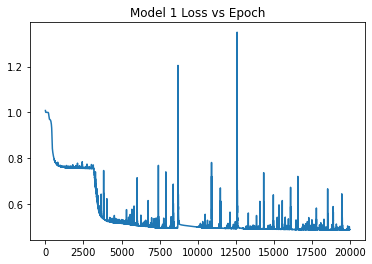

In [29]:
#error vs epoch plot
plt.plot(Model1epoch_array, Model1loss_array)
plt.title('Model 1 Loss vs Epoch')
plt.show()

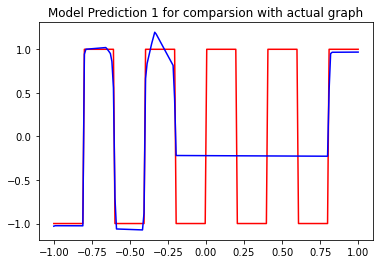

In [30]:
#Comparing the result with the actual plot

#ploting the actual graph of the function
plt.plot(x.numpy(),y.numpy(),color="red")
#ploting the prediction graph
plt.plot(x,Model1prediction.data.numpy(),color="blue")
plt.title('Model Prediction 1 for comparsion with actual graph')
plt.show()

In [31]:
#Function for model 2
class Model2(nn.Module):
    def __init__(self,):
        super().__init__()
        # hidden layers
        self.hiddenlayer1 = nn.Linear(1, 10)   
        self.hiddenlayer2 = nn.Linear(10, 18)
        self.hiddenlayer3 = nn.Linear(18, 15)
        self.hiddenlayer4 = nn.Linear(15, 4)
        # output layer
        self.output = nn.Linear(4, 1)   

        # activation functions for hidden layers
    def forward(self, x):
        x = F.relu(self.hiddenlayer1(x))      
        x = F.relu(self.hiddenlayer2(x))
        x = F.relu(self.hiddenlayer3(x))
        x = F.relu(self.hiddenlayer4(x))
        x = self.output(x)            
        return x     
        

#defining the model
model2 = Model2()

optimizer = torch.optim.Adam(model2.parameters(), lr=0.005, weight_decay = 0.00015)

#finding Mean Squared Error Loss
loss_function = torch.nn.MSELoss()  

summation=[]

for j in model2.parameters():
    summation.append(torch.numel(j))
    
print('Number of parameters in Model 2:', np.sum(summation),)

#Getting weights & bias
print("Model 2: weight and bias before training")

for param in model2.state_dict():
    print(param, "\t",model2.state_dict()[param])

Number of parameters in Model 2: 572
Model 2: weight and bias before training
hiddenlayer1.weight 	 tensor([[-0.8027],
        [-0.2620],
        [ 0.5443],
        [ 0.2957],
        [-0.7571],
        [-0.2359],
        [ 0.4173],
        [ 0.8975],
        [-0.0621],
        [-0.2328]])
hiddenlayer1.bias 	 tensor([ 0.2647, -0.8952, -0.4784, -0.0255, -0.4437, -0.9167, -0.9885, -0.3315,
        -0.1271,  0.8102])
hiddenlayer2.weight 	 tensor([[-0.1235, -0.2209, -0.2908,  0.3139, -0.2552,  0.2184,  0.1931,  0.0093,
         -0.1758,  0.0597],
        [ 0.0102,  0.3101, -0.0537,  0.0285, -0.1899,  0.2908,  0.2720, -0.0675,
          0.2322,  0.2695],
        [-0.1701, -0.3069, -0.3135, -0.1126,  0.0926,  0.1584,  0.1368,  0.2680,
          0.2571, -0.1968],
        [ 0.2587,  0.2309,  0.2745,  0.1552, -0.0827,  0.2668,  0.0428, -0.3156,
          0.1894,  0.2959],
        [-0.0088, -0.0564, -0.2442, -0.1100,  0.1513,  0.1263, -0.1455, -0.2337,
         -0.1480, -0.2101],
        [-0.263

In [32]:
Model2epoch_array,Model2loss_array,Model2prediction = testing(model2,x,y)

epoch: 100, loss = 0.8506
epoch: 200, loss = 0.6496
epoch: 300, loss = 0.4528
epoch: 400, loss = 0.4171
epoch: 500, loss = 0.4079
epoch: 600, loss = 0.4023
epoch: 700, loss = 0.3999
epoch: 800, loss = 0.3954
epoch: 900, loss = 0.3918
epoch: 1000, loss = 0.3895
epoch: 1100, loss = 0.3879
epoch: 1200, loss = 0.4015
epoch: 1300, loss = 0.3932
epoch: 1400, loss = 0.4650
epoch: 1500, loss = 0.3816
epoch: 1600, loss = 0.3805
epoch: 1700, loss = 0.3799
epoch: 1800, loss = 0.3829
epoch: 1900, loss = 0.3781
epoch: 2000, loss = 0.3776
epoch: 2100, loss = 0.3771
epoch: 2200, loss = 0.3788
epoch: 2300, loss = 0.3762
epoch: 2400, loss = 0.3757
epoch: 2500, loss = 0.3758
epoch: 2600, loss = 0.3889
epoch: 2700, loss = 0.3747
epoch: 2800, loss = 0.3745
epoch: 2900, loss = 0.3745
epoch: 3000, loss = 0.3739
epoch: 3100, loss = 0.3740
epoch: 3200, loss = 0.4033
epoch: 3300, loss = 0.3735
epoch: 3400, loss = 0.3849
epoch: 3500, loss = 0.3732
epoch: 3600, loss = 0.3731
epoch: 3700, loss = 0.4340
epoch: 380

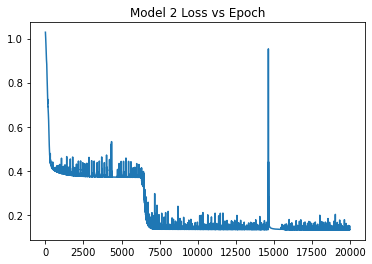

In [33]:
#error vs epoch plot
plt.plot(Model2epoch_array, Model2loss_array)
plt.title('Model 2 Loss vs Epoch')
plt.show()

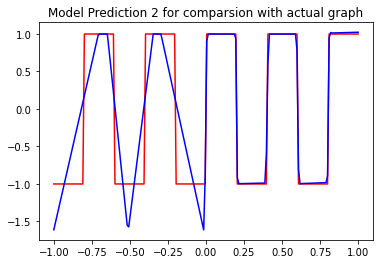

In [34]:
#Comparing the result with the actual plot

#ploting the actual graph of the function
plt.plot(x.numpy(),y.numpy(),color="red")
#ploting the prediction graph
plt.plot(x,Model2prediction.data.numpy(),color="blue")
plt.title('Model Prediction 2 for comparsion with actual graph')
plt.show()

In [35]:
#Function for model 3
class Model3(nn.Module):
    def __init__(self,):
        super().__init__()
        # hidden layers
        self.hiddenlayer = nn.Linear(1, 190)   

        # output layer
        self.output = nn.Linear(190, 1)   

        # activation functions for hidden layers
    def forward(self, x):
        x = F.relu(self.hiddenlayer(x))      
        x = self.output(x)            
        return x     
        

#defining the model
model3 = Model3()

optimizer = torch.optim.Adam(model3.parameters(), lr=0.001, weight_decay = 0.0001) 

#finding Mean Squared Error Loss
loss_function = torch.nn.MSELoss()  

summation=[]

for j in model3.parameters():
    summation.append(torch.numel(j))
    
print('Number of parameters in Model 3:', np.sum(summation),)

#Getting weights & bias
print("Model 3: weight and bias before training")

for param in model3.state_dict():
    print(param, "\t",model3.state_dict()[param])

Number of parameters in Model 3: 571
Model 3: weight and bias before training
hiddenlayer.weight 	 tensor([[-0.7733],
        [ 0.8831],
        [-0.8368],
        [ 0.2980],
        [ 0.0856],
        [ 0.9498],
        [ 0.7278],
        [-0.0387],
        [-0.2868],
        [-0.5452],
        [-0.0937],
        [ 0.4041],
        [-0.3225],
        [-0.7807],
        [ 0.0953],
        [ 0.1628],
        [-0.9826],
        [-0.9055],
        [-0.8649],
        [-0.5357],
        [-0.0610],
        [-0.7322],
        [ 0.2972],
        [ 0.6500],
        [ 0.0380],
        [ 0.7179],
        [-0.7623],
        [ 0.9537],
        [-0.2081],
        [-0.6579],
        [ 0.9466],
        [-0.2803],
        [ 0.6477],
        [-0.6402],
        [ 0.6828],
        [-0.1790],
        [ 0.9800],
        [ 0.9102],
        [ 0.1976],
        [ 0.9419],
        [ 0.6506],
        [-0.2319],
        [ 0.9192],
        [-0.7282],
        [ 0.9395],
        [ 0.3868],
        [ 0.3559],
        

In [36]:
Model3epoch_array,Model3loss_array,Model3prediction = testing(model3,x,y)

epoch: 100, loss = 0.9256
epoch: 200, loss = 0.8859
epoch: 300, loss = 0.8549
epoch: 400, loss = 0.8224
epoch: 500, loss = 0.7886
epoch: 600, loss = 0.7560
epoch: 700, loss = 0.7246
epoch: 800, loss = 0.6930
epoch: 900, loss = 0.6600
epoch: 1000, loss = 0.6258
epoch: 1100, loss = 0.5912
epoch: 1200, loss = 0.5579
epoch: 1300, loss = 0.5268
epoch: 1400, loss = 0.4982
epoch: 1500, loss = 0.4723
epoch: 1600, loss = 0.4489
epoch: 1700, loss = 0.4278
epoch: 1800, loss = 0.4088
epoch: 1900, loss = 0.3915
epoch: 2000, loss = 0.3758
epoch: 2100, loss = 0.3616
epoch: 2200, loss = 0.3488
epoch: 2300, loss = 0.3369
epoch: 2400, loss = 0.3259
epoch: 2500, loss = 0.3158
epoch: 2600, loss = 0.3063
epoch: 2700, loss = 0.2976
epoch: 2800, loss = 0.2895
epoch: 2900, loss = 0.2820
epoch: 3000, loss = 0.2747
epoch: 3100, loss = 0.2678
epoch: 3200, loss = 0.2611
epoch: 3300, loss = 0.2548
epoch: 3400, loss = 0.2488
epoch: 3500, loss = 0.2431
epoch: 3600, loss = 0.2377
epoch: 3700, loss = 0.2325
epoch: 380

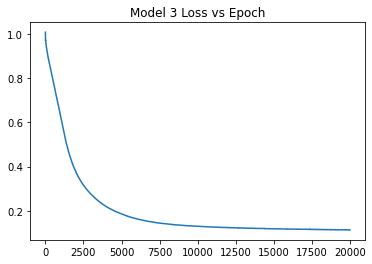

In [37]:
#error vs epoch plot
plt.plot(Model3epoch_array, Model3loss_array)
plt.title('Model 3 Loss vs Epoch')
plt.show()

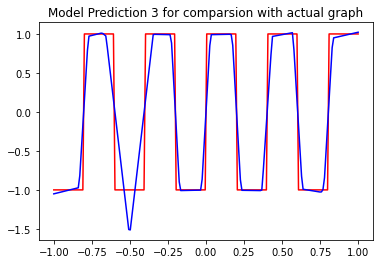

In [38]:
#Comparing the result with the actual plot

#ploting the actual graph of the function
plt.plot(x.numpy(),y.numpy(),color="red")
#ploting the prediction graph
plt.plot(x,Model3prediction.data.numpy(),color="blue")
plt.title('Model Prediction 3 for comparsion with actual graph')
plt.show()

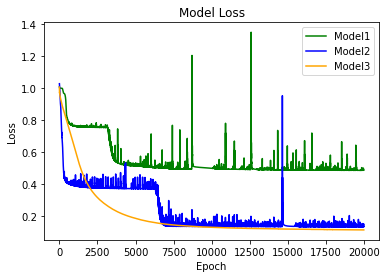

In [39]:
#Plotting the loss functions vs epochs

plt.plot(Model1epoch_array,Model1loss_array, color = "green")
plt.plot(Model2epoch_array,Model2loss_array, color = "blue")
plt.plot(Model3epoch_array,Model3loss_array, color = "orange")
plt.title('Model Loss')
plt.legend(['Model1', 'Model2','Model3'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig('lossepoch_function2.png')
plt.show()


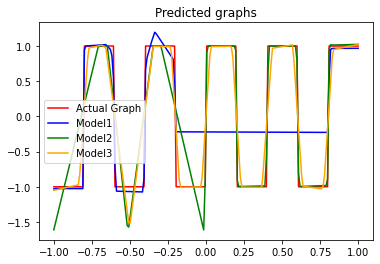

In [40]:
#Plotting the prediction

#ploting the actual graph of the function
plt.plot(x.numpy(),y.numpy(),color="red")
#ploting the prediction graphs
plt.plot(x,Model1prediction.data.numpy(),color="blue")
plt.plot(x,Model2prediction.data.numpy(),color="green")
plt.plot(x,Model3prediction.data.numpy(),color="orange")
plt.title('Predicted graphs')
plt.legend(['Actual Graph', 'Model1', 'Model2','Model3'])
plt.savefig('predicted_function2.png')
plt.show()

In [21]:
####################################End of function 1#########################################